In [579]:
import numpy as np, pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [580]:
df = pd.read_csv('raw_data/student/student-mat.csv', sep=';')

In [581]:
x,y = df.drop(['G1', 'G2'], axis=1), df[['G3']]

### One hot encode the nominal attributes

In [582]:
for col in x.columns:
    if x[col].dtype == 'object':# and col not in ['Mjob', 'Fjob', 'reason', 'guardian']:
        x[col] = x[col].astype('category')
    else:
        x[col] = x[col].astype('float32')
binary_columns = x.select_dtypes(['category']).columns

In [583]:
x[binary_columns] = x[binary_columns].apply(lambda x: x.cat.codes)

In [584]:
columns = list(x.columns)

In [585]:
Mjob = ['MJob{}'.format(i) for i in range(5)]
Fjob = ['FJob{}'.format(i) for i in range(5)]
reason = ['reason{}'.format(i) for i in range(4)]
guardian = ['guardian{}'.format(i) for i in range(3)]

cats = [guardian, reason, Fjob, Mjob]
cats_names = ['Mjob', 'Fjob', 'reason', 'guardian']

for i in range(len(cats)):
#     idx = columns.index(cats_names[i])
    del columns[idx]
    for j in range(len(cats[i])):
        columns.insert(j, cats[i][j])

In [586]:
mask = [(col in ['Mjob', 'Fjob', 'reason', 'guardian']) for col in x.columns]

In [587]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', categorical_features=mask)
data = ohe.fit_transform(x)

/Users/adamnoack/anaconda/envs/hack/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [588]:
x2 = pd.DataFrame(data, columns=columns)

### Convert continuous y to binary (1 = final score > 10, 0 = final score <= 10)

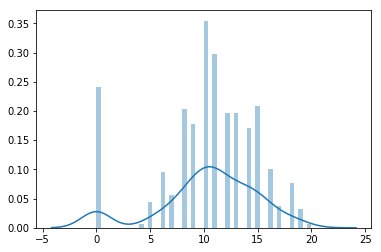

In [589]:
sns.distplot(y.values, bins=50)
plt.show()

In [590]:
len([v for v in list(y.values) if v > 10])

209

In [591]:
y_clas = y.copy(deep=True)

In [592]:
y_clas['G3'] = np.where(y_clas['G3']>=10, 1, 0)

### Normalize input data

In [593]:
x_mean = (x2-x2.mean())/x2.std()

In [594]:
x_mean.to_pickle('clean_data/x_mean.pkl')
y_clas.to_pickle('clean_data/y_clas.pkl')
y.to_pickle('clean_data/y_reg.pkl')

In [595]:
from sklearn.preprocessing import MinMaxScaler

In [596]:
scaler = MinMaxScaler()

In [597]:
x_minmax = pd.DataFrame(scaler.fit_transform(x2), columns=x2.columns)

In [598]:
x_minmax.to_pickle('clean_data/x_minmax.pkl')

In [601]:
y_negpos = y_clas.copy(deep=True)

In [602]:
y_negpos['G3'] = np.where(y_negpos['G3']==0, -1, 1)

In [605]:
y_negpos.to_pickle('clean_data/y_negpos.pkl')